# **INTRODUCTION-**
### **When we hear about the hotel booking we definitely hear about Trivago,OYO,5/7 Star hotels,Tent,etc.. Many people used online hotel booking on the basis of reveiws and a type of hotel. The main few things,human beings will usually consider include prices per night, distance of hotel from attractions and restaurants, availability of free breakfasts, scenery in hotel room, cleaniness of hotel room and of course, availability of free wifi. In this dataset, we are able to know different types of bookings (i.e type of hotel, duration of stay, types of visitors, types of customers, etc).**


# **SCOPE OF THE PROJECT-**
**The objective of the project is obtain the meaningful analysis about the Hotel Bookings with respect to the factors asscociated with it. Mainly focused on terms as below-**

1. Data Prepping/Wrangling.
2. Visualizing the best time for Hotel booking,Price for Hotel bookings and special requests fulfillment by Hotels.
3. Overview of Country for Hotel bookings.
4. Visualization of Meal preference and hotel bookings/cancellation.
4. Correlaton between variables.
 







# **PROBLEM STATEMENT-**
### <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# **DATA PREPPING**

In [1]:
#Accessing the google drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


**Importing the libraries-**


In [2]:
#Importing libraries for Exploratory data Analysis
import numpy as np                               # For some math operations on arrays in predictions.
import pandas as pd                              # To upload the large data set and wrangling the data.
import matplotlib.pyplot as plt                  # Used for visualization of dataset.
import seaborn as sns                            # Used for visualization of dataset.
import plotly.express as px                      # Graphing library which makes interactive, publication-quality graphs.
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator   # Used to represent the frequency of most word arriving in the data set for particular column as required.
import plotly.graph_objects as go                # Used to provide precise data validation.
import warnings                                  # For filtering and ignoring the warnings.
warnings.filterwarnings('ignore')
import missingno as mno                          # Missingno library for checking missing value.



In [3]:
# Loading Data set of csv file
HBA=pd.read_csv('/content/drive/MyDrive/Hotel Booking Analysis -Poonam Shevkar/ Hotel Bookings Data.csv')


**First five values of dataset of Hotel Booking analysis**

In [4]:
HBA.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


**Last five values of dataset of Hotel Booking Analysis**

In [5]:
HBA.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


# **Some Basic Information about Data set-**

In [6]:
HBA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
# To understand some statistics of our dataset-
HBA.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [8]:
# To observe the column variables length,type and shape.
list(HBA.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [9]:
len(HBA.columns)

32

In [10]:
HBA.shape

(119390, 32)

In [11]:
type(HBA)

pandas.core.frame.DataFrame

# **Checking the Null values for cleaning the Dataset for further analysis.**

In [12]:
HBA.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

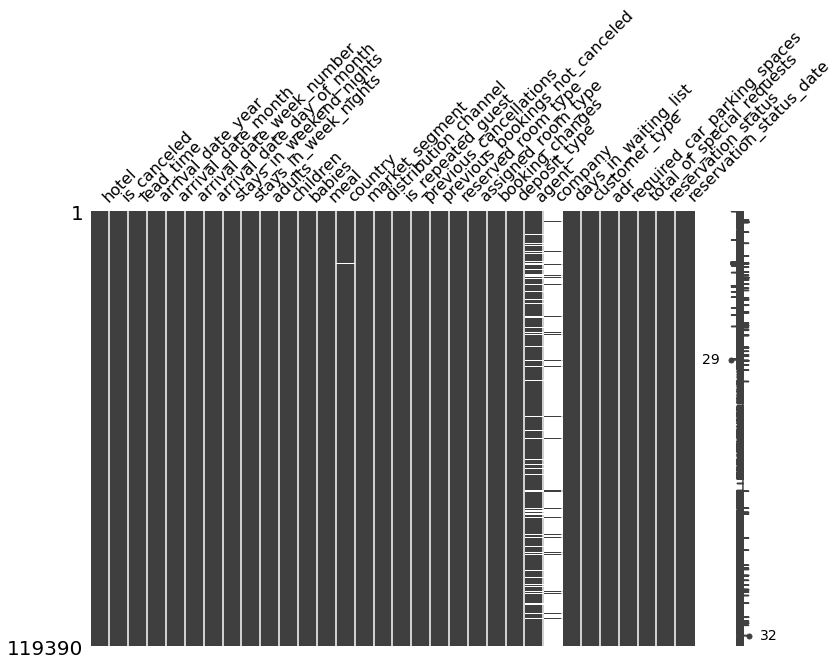

In [13]:
# To visualize the Null values disturbance in dataset-
mno.matrix(HBA,figsize=(12,8))

**Now, to remove the Null values- we replace the null values by 0**

In [14]:
HBA['children'].fillna('unknown',inplace=True)
HBA['country'].fillna('unknown',inplace=True)
HBA['agent'].fillna('unknown',inplace=True)
HBA['company'].fillna('unknown',inplace=True)

In [15]:
# Again checking the Null values after replacing it in Dataset-
HBA.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

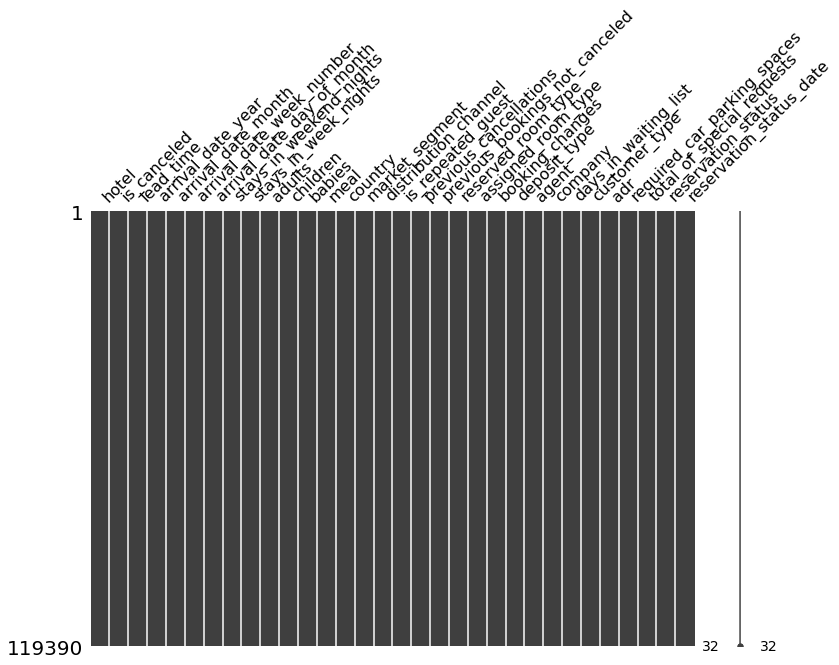

In [16]:
mno.matrix(HBA,figsize=(12,8))

**REMARK - Finally, we created the dataset without NAN values .**

In [17]:
# To check the uniqueness of variables -
HBA.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             6
babies                               5
meal                                 5
country                            178
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              334
company                            353
days_in_waiting_list     

## **Let's check the count for some variables of column-**

In [18]:
hotel_type=HBA['hotel'].value_counts()
hotel_type

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [19]:
HBA.country.value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
MMR        1
MLI        1
LCA        1
BWA        1
VGB        1
Name: country, Length: 178, dtype: int64

In [20]:
HBA.children.value_counts()

0.0        110796
1.0          4861
2.0          3652
3.0            76
unknown         4
10.0            1
Name: children, dtype: int64

In [21]:
HBA.agent.value_counts()

9.0        31961
unknown    16340
240.0      13922
1.0         7191
14.0        3640
           ...  
358.0          1
54.0           1
367.0          1
388.0          1
158.0          1
Name: agent, Length: 334, dtype: int64

# **EXPLORATRY DATA ANALYSIS - DATA VISUALIZATION**

# **Percentage of Hotel bookings-**

([<matplotlib.patches.Wedge at 0x7f254c3e5490>,
 [Text(-0.956416133381298, -0.5433858480011854, 'City Hotel'),
  Text(1.0433630545977801, 0.592784561455838, 'Resort Hotel')],
 [Text(-0.5216815272988897, -0.29639228072791923, '66.4%'),
  Text(0.6086284485153717, 0.3457909941825721, '33.6%')])

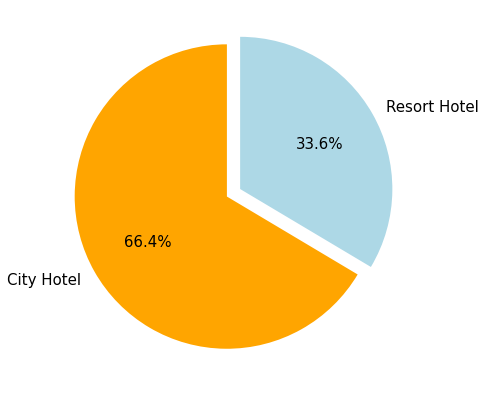

In [22]:
# Pie chart to visualize the Hotel booking percentage.
plt.rcParams['figure.figsize']=7,7
labels=hotel_type.index.tolist()
sizes=hotel_type.tolist()
explode=(0,0.1)
colors=['orange','lightblue']
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',startangle=90,textprops={'fontsize':15})

### ***Comment:-  A huge proportion of hotels was City Hotel.Resort hotel tends to be expensive side and most likely people visit that type of hotel in weekends, so people will stick with city hotel more in number.***

# **Overview of Hotel Bookings in periods.**

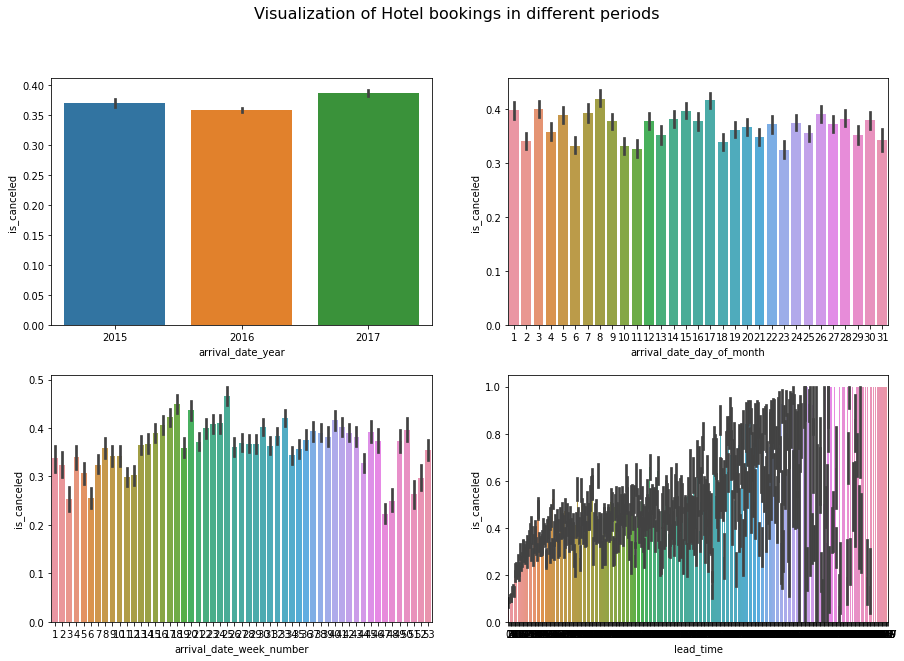

In [23]:
# Barplot to visualize the hotel bookings in different periods.
fig,axes = plt.subplots(2,2,figsize=(15,10))
fig.suptitle('Visualization of Hotel bookings in different periods', fontsize=16)
sns.barplot(HBA['arrival_date_year'],HBA['is_canceled'],ax=axes[0,0])
sns.barplot(HBA['arrival_date_day_of_month'],HBA['is_canceled'],ax=axes[0,1])
sns.barplot(HBA['arrival_date_week_number'],HBA['is_canceled'],ax=axes[1,0])
sns.barplot(HBA['lead_time'],HBA['is_canceled'],ax=axes[1,1])
plt.show()


### ***Comment:- As compared to Cancellations Hotel Bookings are more in the year 2017 and we can say that there is more variation of Hotel Bookings between months and week.Moreover, cancellation rate increases with increase in Lead time.***

## **Repeated Guests Pattern-**

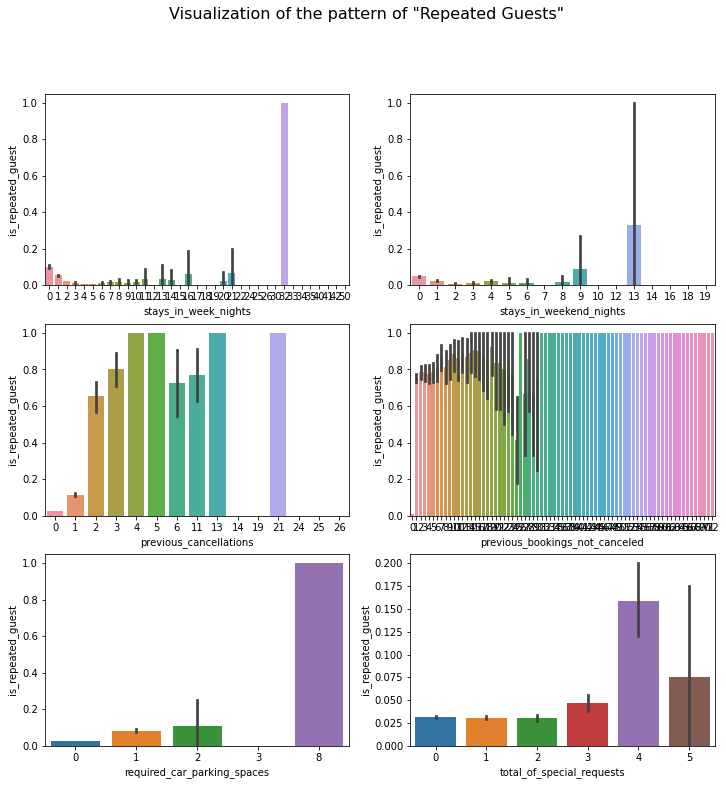

In [24]:
fig,axes = plt.subplots(3,2,figsize=(12,12))
fig.suptitle('Visualization of the pattern of "Repeated Guests" ', fontsize=16)
sns.barplot(HBA['stays_in_week_nights'],HBA['is_repeated_guest'],ax=axes[0,0])
sns.barplot(HBA['stays_in_weekend_nights'],HBA['is_repeated_guest'],ax=axes[0,1])
sns.barplot(HBA['previous_cancellations'],HBA['is_repeated_guest'],ax=axes[1,0])
sns.barplot(HBA['previous_bookings_not_canceled'],HBA['is_repeated_guest'],ax=axes[1,1])
sns.barplot(HBA['required_car_parking_spaces'],HBA['is_repeated_guest'],ax=axes[2,0])
sns.barplot(HBA['total_of_special_requests'],HBA['is_repeated_guest'],ax=axes[2,1])
plt.show()

### ***Comment:- Hence,following patterns can see according to repeated guests for stay in nights, required car parking spaces , guest special requets , previous cancellations and previous not cancelled bookings.***

# **Best time of year to book a hotel room -**

In [25]:
arrival_month=HBA['arrival_date_month'].value_counts()
arrival_month

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

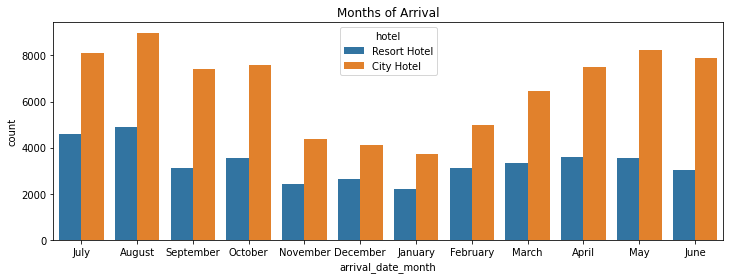

In [26]:
plt.figure(figsize=(12,4))
sns.countplot(x='arrival_date_month', hue = 'hotel', data=HBA)
plt.title('Months of Arrival')
plt.show()

### ***Comment:- For both City hotel and Resort hotel have the highest bookings in the month of August and lowest bookings in the month of January.***

### **Which are the most busy months?**

In [27]:
#Getting the no. of guests with respective to type of hotel-
data_resort = HBA[(HBA['hotel'] == 'Resort Hotel') & (HBA['is_canceled'] == 0)]
data_city = HBA[(HBA['hotel'] == 'City Hotel') & (HBA['is_canceled'] == 0)]

resort_guests = data_resort['arrival_date_month'].value_counts().reset_index()
resort_guests.columns=['month','no of guests']
resort_guests

,month,no of guests
0,August,3257
1,July,3137
2,October,2577
3,March,2573
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2038
9,December,2017


In [28]:
city_guests = data_city['arrival_date_month'].value_counts().reset_index()
city_guests.columns=['month','no of guests']
city_guests

,month,no of guests
0,August,5381
1,July,4782
2,May,4579
3,June,4366
4,October,4337
5,September,4290
6,March,4072
7,April,4015
8,February,3064
9,November,2696


In [29]:
# Merging the Resort Hotel and City Hotel to get no. of guests as per month-
final_guests = resort_guests.merge(city_guests,on='month')
final_guests.columns=['month','no of guests in resort','no of guest in city hotel']
final_guests

,month,no of guests in resort,no of guest in city hotel
0,August,3257,5381
1,July,3137,4782
2,October,2577,4337
3,March,2573,4072
4,April,2550,4015
5,May,2535,4579
6,February,2308,3064
7,September,2102,4290
8,June,2038,4366
9,December,2017,2392


## Sorting the month for better understanding-

In [30]:
# Installing required packages-
!pip install sort-dataframeby-monthorweek

!pip install sorted-months-weekdays

  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3441 sha256=d4f21c21c148552b60dc7c4e282866ef7f407bf37c458059982f1913107e2c87
  Stored in directory: /root/.cache/pip/wheels/de/e1/ad/5fe265a9780676079c4b8caaaffaa8d5c4ab2f37cf823e8aa8
Successfully built sort-dataframeby-monthorweek
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3247 sha256=e20e1cd22cea4ff45e5b0c01c654f230865067489df25188dbc3e25971987f1c
  Stored in directory: /root/.cache/pip/wheels/4f/4f/78/3f1b8fc72651f7c766a6f73d667fccb12a8aabe240b38df7a4
Successfully built sorted-months-weekdays


In [31]:
# To sort the dataframe by month/week-

import sort_dataframeby_monthorweek as sd     
def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df, column_name)

In [32]:
#Sorting the month for better understanding-
final_guests = sort_month(final_guests,'month')
final_guests

,month,no of guests in resort,no of guest in city hotel
0,January,1868,2254
1,February,2308,3064
2,March,2573,4072
3,April,2550,4015
4,May,2535,4579
5,June,2038,4366
6,July,3137,4782
7,August,3257,5381
8,September,2102,4290
9,October,2577,4337


### ***Comment:- Month of July and August is the most busy Months for Both city and Resort Hotels.***

#**Best rate of Hotel-**

In [33]:
#what are the average prices for each person per night by hotel?

def average_daily_rate_person():
    for h in HBA.hotel.unique():
        print(f'Average daily rate per person: {HBA[HBA.hotel == h].adr.mean():.2f} in {h}.')
    return

average_daily_rate_person()

Average daily rate per person: 94.95 in Resort Hotel.
Average daily rate per person: 105.30 in City Hotel.


### **Guests pay for a room per night-**



In [34]:
# Plotting the Box plot to observe the average daly rate for reserved room in hotel-
data = HBA[HBA['is_canceled'] == 0]

px.box(data_frame = data, x = 'reserved_room_type', y = 'adr', color = 'hotel', template = 'plotly_white')

### ***Comment:- The figure shows that the average price per room depends on its type and the standard deviation.***

### **How long do people stay at the hotels?**

In [35]:
#what is the average stay in days?

def average_stay_days():
    stay = HBA.loc[HBA.is_canceled == 0, ['hotel', 'stays_in_week_nights', 'stays_in_weekend_nights']] 
    stay['nights'] = stay.stays_in_week_nights + stay.stays_in_weekend_nights    
    stay = stay.groupby('hotel').agg({'nights': 'mean'})
    
    return stay

average_stay_days()



,nights
hotel,
City Hotel,2.923618
Resort Hotel,4.142892


### ***Comment:- On observation ,the average stay in days are at hotels 5 nights.***

In [36]:
#To filter the data by a required column -
filter = HBA['is_canceled'] == 0
data = HBA[filter]
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,unknown,unknown,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,unknown,unknown,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,unknown,unknown,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,unknown,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,unknown,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [37]:
# To create a column of total nights -
data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,unknown,unknown,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,unknown,unknown,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,unknown,unknown,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,unknown,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,unknown,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


In [38]:
# To observe the stay by grouping the total nights and hotel-
stay = data.groupby(['total_nights', 'hotel']).agg('count').reset_index()
stay = stay.iloc[:, :3]
stay = stay.rename(columns={'is_canceled':'Number of stays'})
stay

,total_nights,hotel,Number of stays
0,0,City Hotel,308
1,0,Resort Hotel,372
2,1,City Hotel,9169
3,1,Resort Hotel,6580
4,2,City Hotel,10992
...,...,...,...
63,49,City Hotel,1
64,56,Resort Hotel,1
65,57,City Hotel,1
66,60,Resort Hotel,1


In [39]:
# Barplot to visualize the no. of stays -
px.bar(data_frame = stay, x = 'total_nights', y = 'Number of stays', color = 'hotel', barmode = 'group',
        template = 'plotly_dark')

### ***Comment:-  Maximum number of people stays for 1 night in Resort hotels and 3 nights in City Hotel.***

## **Checking the price vary per night over the year-**

In [40]:
# Grouping the data for price variation per night over the year-

resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.322236
3,February,54.147478
4,January,48.708919
5,July,150.122528
6,June,107.921869
7,March,57.012487
8,May,76.657558
9,November,48.681640


In [41]:
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

,arrival_date_month,adr
0,April,111.856824
1,August,118.412083
2,December,87.856764
3,February,86.183025
4,January,82.160634
5,July,115.563810
6,June,117.702075
7,March,90.170722
8,May,120.445842
9,November,86.500456


In [42]:
final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
final_hotel

,month,price_for_resort,price_for_city_hotel
0,April,75.867816,111.856824
1,August,181.205892,118.412083
2,December,68.322236,87.856764
3,February,54.147478,86.183025
4,January,48.708919,82.160634
5,July,150.122528,115.563810
6,June,107.921869,117.702075
7,March,57.012487,90.170722
8,May,76.657558,120.445842
9,November,48.681640,86.500456


### **Now we observe here that month column is not in order, and if we visualize we will get improper conclusions.**

### **So, first we have to provide right hierarchy to month column.**

In [43]:
final_prices = sort_month(final_hotel, 'month')
final_prices

,month,price_for_resort,price_for_city_hotel
0,January,48.708919,82.160634
1,February,54.147478,86.183025
2,March,57.012487,90.170722
3,April,75.867816,111.856824
4,May,76.657558,120.445842
5,June,107.921869,117.702075
6,July,150.122528,115.563810
7,August,181.205892,118.412083
8,September,96.416860,112.598452
9,October,61.727505,101.745956


### ***Comment:-Seasonal pattern is observed in the price of Hotel room over the year.***

## **Visualizing the Special Requests received from guests to Hotels-**

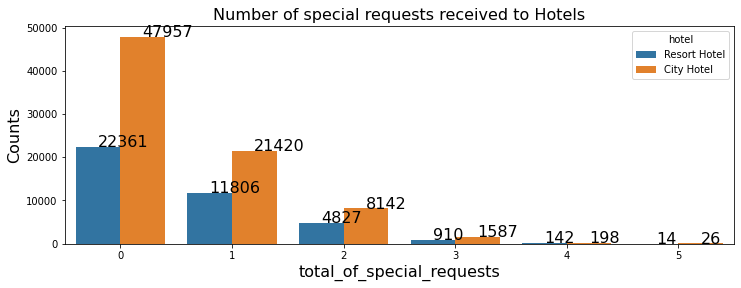

In [44]:
# Plotting the multiple bar diagram to visualize the special requets by guests in hotels-
special_req=HBA['total_of_special_requests'].value_counts()
plt.figure(figsize=(12,4))
ch=sns.countplot(x='total_of_special_requests', hue = 'hotel', data=HBA)
plt.title('Months of Arrival')
plt.xlabel('total_of_special_requests', size=16)
plt.ylabel('Counts', size=16)
plt.title('Number of special requests received to Hotels', size=16)
for p in ch.patches:
    ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), size=16)
plt.show()

### ***Comment:- City hotel has the huge special requets whereas Resort hotel has the lowest special requets from the guests.***

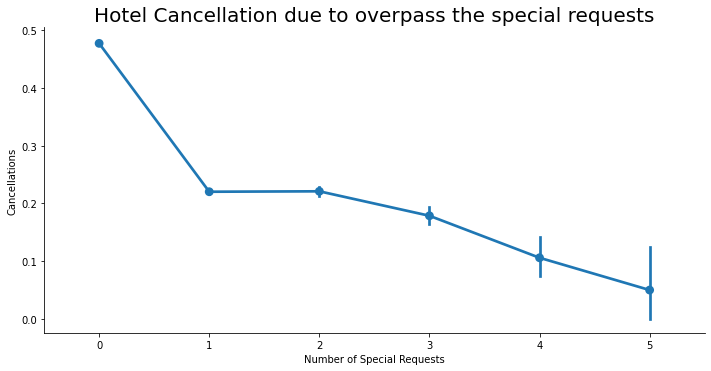

In [45]:
 #Point Plot for visualising the cancellation rate on the basis of special request-
sns.catplot(y='is_canceled',x='total_of_special_requests',kind='point',data=HBA,height=5,aspect=2)
plt.xlabel('Number of Special Requests',size=10)
plt.ylabel('Cancellations',size=10)
plt.title('Hotel Cancellation due to overpass the special requests',size=20)
plt.show()

### ***Comment:- As special requests from guests increases cancellation rate decreases.***

### ***Remark:- High negative total of special requests with cancelation. My hypothesis is that when a customer has more special reqeusts and they are met, the customer is more likely to stay with the hotel***

# **Overview of Countries for Hotel Bookings-**

In [ ]:
# To check the frequency of highest bookings of hotel room from Country-
from wordcloud import WordCloud
from scipy import signal
WordCloud(collocations=False)
state= HBA.country.dropna(0)
plt.subplots(figsize=(20,10))
wordcloud = WordCloud(max_words=100,background_color = 'white',
                     width = 500,
                     height = 400).generate(' '.join(state))
plt.axis('off')
plt.imshow(wordcloud,interpolation='bilinear')
plt.show()

### ***Comment:- Country 'PRT' has more frequency of hotel bookings as per other countries like GBR,FRA,ESP,etc.***

**Now, we will see count for the first 15 countries -**

---



In [ ]:
HBA.country.value_counts()[:15]

In [ ]:
# Groupby by country
country = HBA.groupby("country")

# Summary statistic of all countries
country.describe().head()

In [ ]:
# selects the top 5 highest average points among all 44 countries:

country.mean().sort_values(by="lead_time",ascending=False).head()

In [ ]:
#Area plot for wide visualization of country-
pd.crosstab(HBA.country,HBA.arrival_date_year).plot(kind='area',figsize=(20,10))
plt.title('Hotel booking from the most common country')
plt.ylabel('Number of hotel bookings in arrival year')
plt.show()

### ***Comment:- Above Area Graph shows the fluctuations of countries with respect to Hotel Bookings and the highest peak is observe in between the 'NPL' and 'STP' countries.***



### ***Which are the three most common and uncommon countries of origin?***


In [ ]:
print('Most common countries:')
print(HBA.country.value_counts().head(3))
print('-'*50)
print('\n Most uncommon countries:')
print(HBA.country.value_counts().tail(35))

### ***Comment:- As we can see, Portugal tops the list with 48,590 of the cases, followed by Great Britain with 12,129 and France with 10,415. There are 30 countries that can be considered as the most uncommon country of origin, with 1 guest per country. Among these, we have Madagascar, Dominica, Mali, Guyana, Palau, Kiribati, Sudan, etc.***



# ***Visualization of countries with the no. of guests by using Folium Map-***

In [ ]:
country_wise_guests = HBA[HBA['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']
country_wise_guests

In [ ]:
import folium                             # Use to visualize the country map
from folium.plugins import HeatMap        # To show the values of variables on map. 
basemap = folium.Map()
guests_map = px.choropleth(country_wise_guests, locations = country_wise_guests['country'],
                           color = country_wise_guests['No of guests'], hover_name = country_wise_guests['country'])
guests_map.show()


### ***Comment:- People from all over the world are staying in City and Resort hotel. Most guests are from Portugal and other countries in Europe.***

## **Now, we will observe the Deposit type for hotels-**

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = HBA['deposit_type'].value_counts().index.tolist()
sizes = HBA['deposit_type'].value_counts().tolist()
explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')


fig1, ax1 = plt.subplots(figsize=(15,10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',textprops={'fontsize': 14},
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Deposit Type',fontsize=30)
plt.legend(['Refundable','Non Refund','No Deposit'],loc='upper left',bbox_to_anchor=(1,1),fontsize=15)
plt.show()

### ***Comment:-  'No deposit' has the highest percentage rate with respect to refundable and non-refundable deosite type.Majority of bookings did not require a deposit, this could explain the high cancelation rate.***

### **Bookings / Cancelled Bookings by different types of customers-**

In [ ]:
# Bookings done including cancelled bookings made by different types of customers.

# df.customer_type.unique()
customer_bookings = HBA.groupby(['customer_type','is_canceled']).count().hotel.reset_index()
customer_bookings.rename(columns = {'hotel':'bookings'} , inplace = True)
print(customer_bookings)

# Plotting The graph
plt.figure(figsize = (10,6))

ax = sns.barplot('customer_type', 'bookings', hue='is_canceled', data=customer_bookings );

plt.title("Number of booking made / cancelled by different types of customers")
plt.xlabel("Customer Type")
plt.ylabel("Number of bookings ")

leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles, ['Not Cancelled', 'Booking Cancelled'], title='Cancelled');

### ***Comment:- Transient and Transient-party have more Bookings / Cancelled Bookings than Contract  & Group.***

## **Meal preference by customers-**

## ***Checking the most popular meal package-***

In [ ]:
#To plot the countplot for meal plan preference-
HBA.meal.value_counts(normalize=True)

### ***Remark-The Bed & Breakfast option is the most popular, with a frequency of 77.26%***

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(HBA['meal'], palette='husl')
plt.show()

### ***Comment- Here we observe that BB i.e Breakfast Bed Meals are preferred more by guests and undefined is less choosen by guests.***

## **Overview for Market Segments and Distribution Channel For Hotel Booking Publicity-**

In [ ]:
#Looking into market segments and distribution channel
plt.figure(figsize=(10,5))
sns.countplot(data = HBA, x = 'market_segment').set_title('Types of market segment', fontsize = 20)

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data = HBA, x = 'distribution_channel').set_title('Types of distribution channel', fontsize = 20)

### ***Comment:- Majority of the distribution channels and market segments involve travel agencies (online or offline).We can target our marketing area to be on these travel agencies website and work with them since majority of the visitors tend to reach out to them.***

# **correlated variables in dataset-**

In [ ]:
corr=HBA.corr()
corr
correlation = HBA.corr()['is_canceled'].abs().sort_values(ascending = False)
correlation

### ***Comment:- The variable 'is_cancelled' is highly correlated with 5 variables name as - lead_time,total_of_special_requests,required_car_parking_spaces, booking_changes, previous_cancellations.***

## **Heat Map to visualize the correlated variables-**

In [ ]:
plt.figure(figsize=(22,15))
sns.heatmap(HBA.corr(), annot=True,linewidths=4)
plt.title('Correlation between all the variables',size=20,)
plt.show() 

### ***Comment:-The first 5 variables (lead_time, total_of_special_requests, required_car_parking_spaces, booking_changes, previous_cancellations) can be used for building a model in future, since they are the ones with correlation > 0.10 for is_canceled.***

## **Demonstration of the relationship between the variables-**

In [ ]:
#Plotting the scatter plot to visualize the pattern of relationship between the variables-

sns.scatterplot(data=HBA, y="lead_time", x="stays_in_week_nights")

### ***Comment:- We can conclude that,Lead time will be maximum when there wil be minimum stay at week nights by the guests at hotel.And,we observe that there is negative correlation between the independent and dependent variable.***